In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Import the dataset
df = pd.read_csv("Datasets\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

No missing values. 

In [4]:
# Check for multiple datatypes in individual features
def check_multiple_datatypes(df):
    results = {}
    for column in df.columns:
        # Get the set of types for each element in the column
        types = set(df[column].apply(type))
        if len(types) > 1:
            results[column] = types
    return results

# Check each column in the DataFrame
result = check_multiple_datatypes(df)
print(result)


{}


Features are clean with only a single datatype.

In [5]:
# For each feature that is an object, check the unique values
def check_unique_values(data):
    results = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            results[column] = data[column].nunique()
    return results

check_unique_values(df)

{'Customer': 9134,
 'State': 5,
 'Response': 2,
 'Coverage': 3,
 'Education': 5,
 'Effective To Date': 59,
 'EmploymentStatus': 5,
 'Gender': 2,
 'Location Code': 3,
 'Marital Status': 3,
 'Policy Type': 3,
 'Policy': 9,
 'Renew Offer Type': 4,
 'Sales Channel': 4,
 'Vehicle Class': 6,
 'Vehicle Size': 3}

The only categorical features which can't be one hot encoded are Customer and Effective To Date, which won't be necessary when building models. 

In [6]:
df["Customer Lifetime Value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

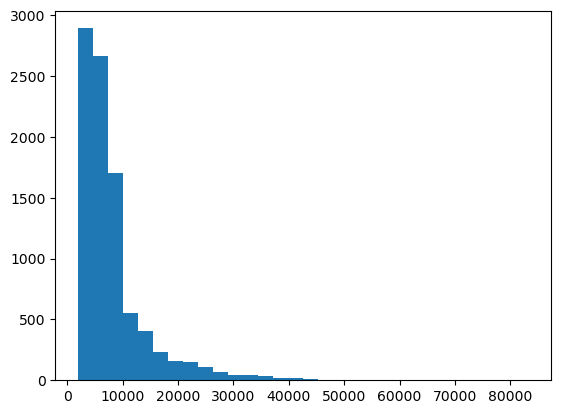

In [7]:
plt.hist(df["Customer Lifetime Value"], bins=30)
plt.show()

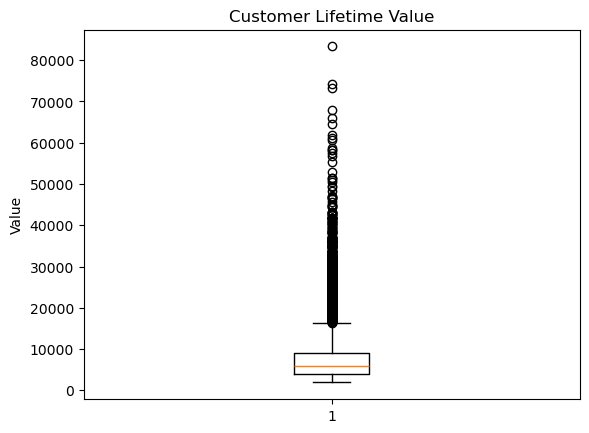

In [8]:
plt.boxplot(df["Customer Lifetime Value"])
plt.title("Customer Lifetime Value")
plt.ylabel("Value")
plt.show()

In [19]:
df[df["Customer Lifetime Value"] > 10000].count()

Customer                         1886
State                            1886
Customer Lifetime Value          1886
Response                         1886
Coverage                         1886
Education                        1886
Effective To Date                1886
EmploymentStatus                 1886
Gender                           1886
Income                           1886
Location Code                    1886
Marital Status                   1886
Monthly Premium Auto             1886
Months Since Last Claim          1886
Months Since Policy Inception    1886
Number of Open Complaints        1886
Number of Policies               1886
Policy Type                      1886
Policy                           1886
Renew Offer Type                 1886
Sales Channel                    1886
Total Claim Amount               1886
Vehicle Class                    1886
Vehicle Size                     1886
dtype: int64

Let's create models to find customers that have a CLV over 10,000. 

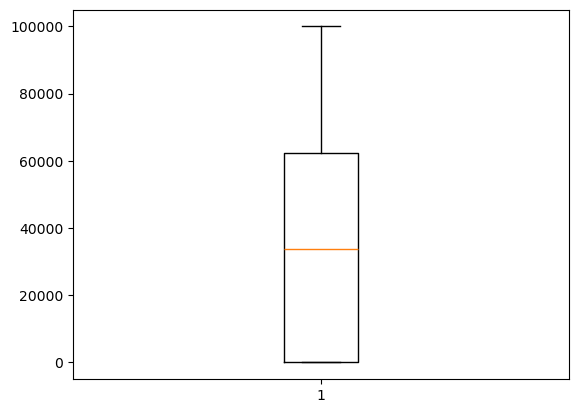

In [20]:
plt.boxplot(df["Income"])
plt.show()